# Lab 6
### Morphology

Skimage morphology operators' documentation:
https://scikit-image.org/docs/dev/api/skimage.morphology.html

In [2]:
from commonfunctions import *
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.morphology import binary_erosion, binary_dilation, binary_closing,skeletonize, thin
from skimage.measure import find_contours
from skimage.draw import rectangle
plt.style.use('dark_background')
# Show the figures / plots inside the notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


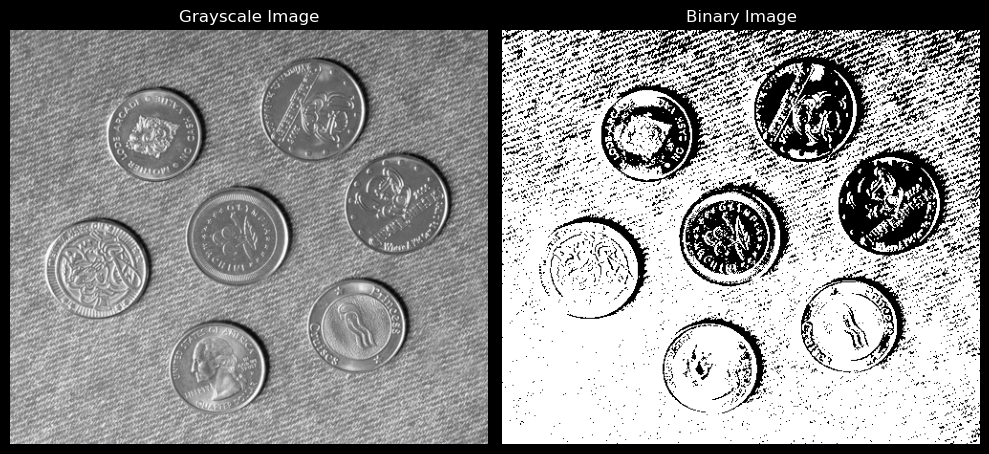

In [ ]:
'''
1) Erosion / Dilation:

    - Load "coins.jpg" from the img folder
    

    - Convert the image to binary
    - Write 2 functions each applying 1 of the erosion/dilation algorithms (with adjustable square window size) manually to the binary image
    - Use Skimage's "binary_erosion" & "binary_dilation" & show the results
'''
# from skimage.filters import threshold_otsu
original_img = io.imread('img/coins.jpg')
gray_image = rgb2gray(original_img)


fixed_threshold = 0.5
binary_image = gray_image > fixed_threshold

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(gray_image, cmap='gray')
axes[0].set_title("Grayscale Image")
axes[0].axis("off")

axes[1].imshow(binary_image, cmap='gray')
axes[1].set_title("Binary Image")
axes[1].axis("off")

plt.tight_layout()
plt.show()



# Manuall Erosion and Dillation

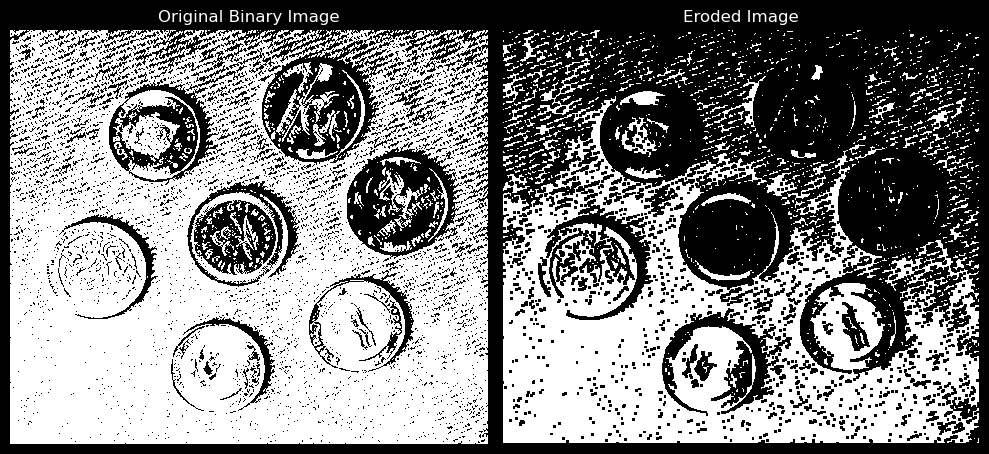

In [10]:
def manual_erosion(binary_image, window_size):

    pad = window_size // 2
    padded_image = np.pad(binary_image, pad, mode='constant', constant_values=0)
    eroded_image = np.zeros_like(binary_image)
    # print(padded_image)
    for i in range(binary_image.shape[0]):
        for j in range(binary_image.shape[1]):
            window = padded_image[i:i + window_size, j:j + window_size]
          
            if np.all(window == 1):
                eroded_image[i, j] = 1

    return eroded_image
eroded_image=manual_erosion(binary_image,3)
# Plotting
plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 1)
plt.title("Original Binary Image")
plt.imshow(binary_image, cmap='gray', interpolation='nearest')
plt.axis('off')


plt.subplot(1, 2, 2)
plt.title("Eroded Image")
plt.imshow(eroded_image, cmap='gray', interpolation='nearest')
plt.axis('off')

plt.tight_layout()
plt.show()


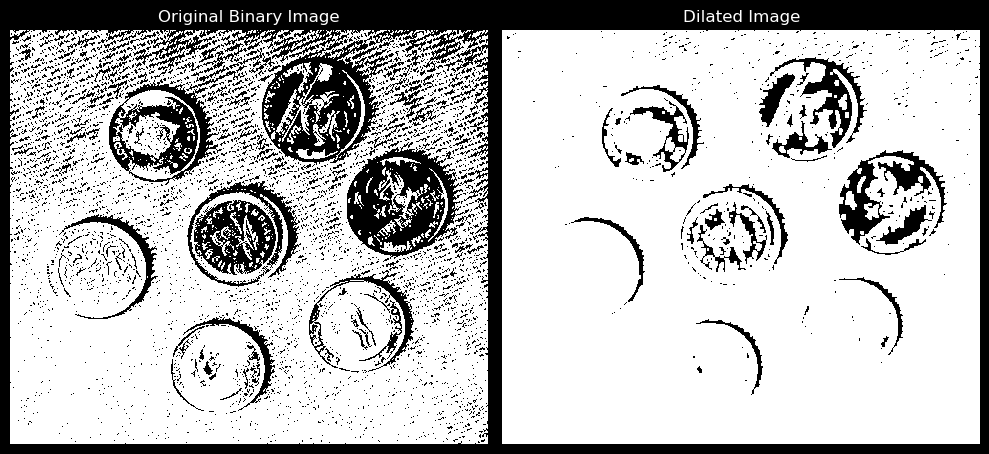

In [12]:
def manual_dilation(binary_image, window_size):
    pad = window_size // 2
    padded_image = np.pad(binary_image, pad, mode='constant', constant_values=0)
    dilated_image = np.zeros_like(binary_image)

    for i in range(binary_image.shape[0]):
        for j in range(binary_image.shape[1]):
            window = padded_image[i:i + window_size, j:j + window_size]
           
            if np.any(window == 1):
                dilated_image[i, j] = 1

    return dilated_image
dilated_image=manual_dilation(binary_image,3)
# Plotting
plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 1)
plt.title("Original Binary Image")
plt.imshow(binary_image, cmap='gray', interpolation='nearest')
plt.axis('off')


plt.subplot(1, 2, 2)
plt.title("Dilated Image")
plt.imshow(dilated_image, cmap='gray', interpolation='nearest')
plt.axis('off')

plt.tight_layout()
plt.show()

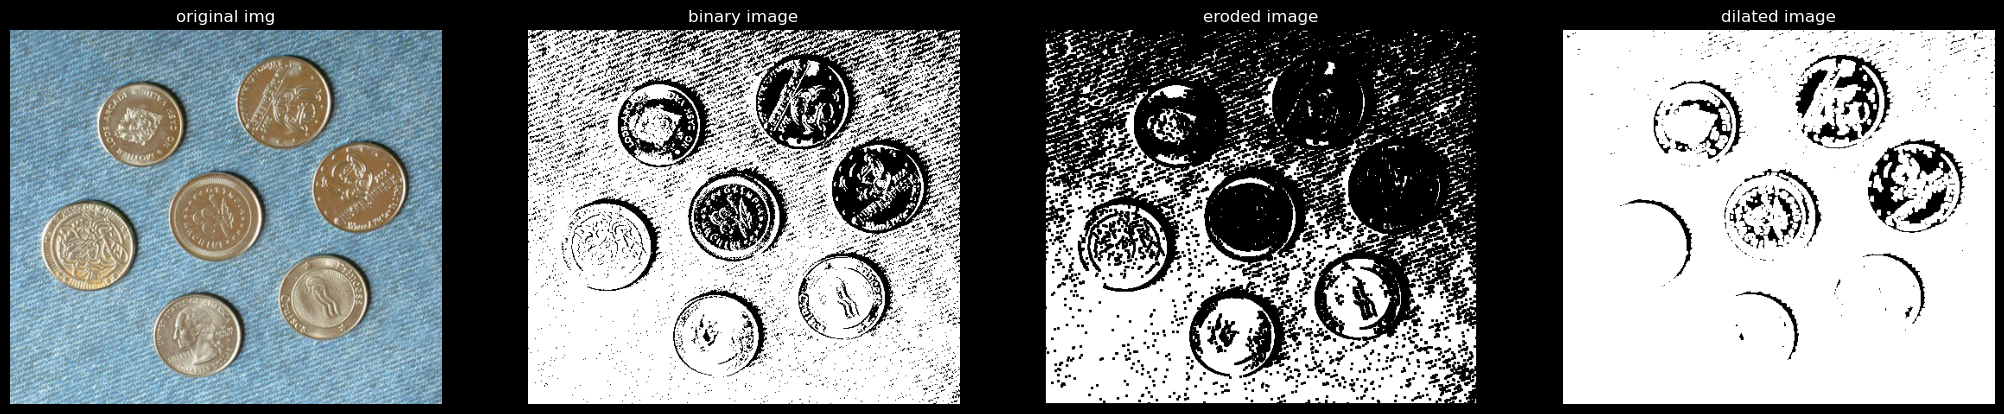

In [ ]:
images=[original_img,binary_image,eroded_image,dilated_image]
titles=['original img','binary image','manaul eroded image ','manaul dilated image']
show_images(images,titles)

# Using built in methods

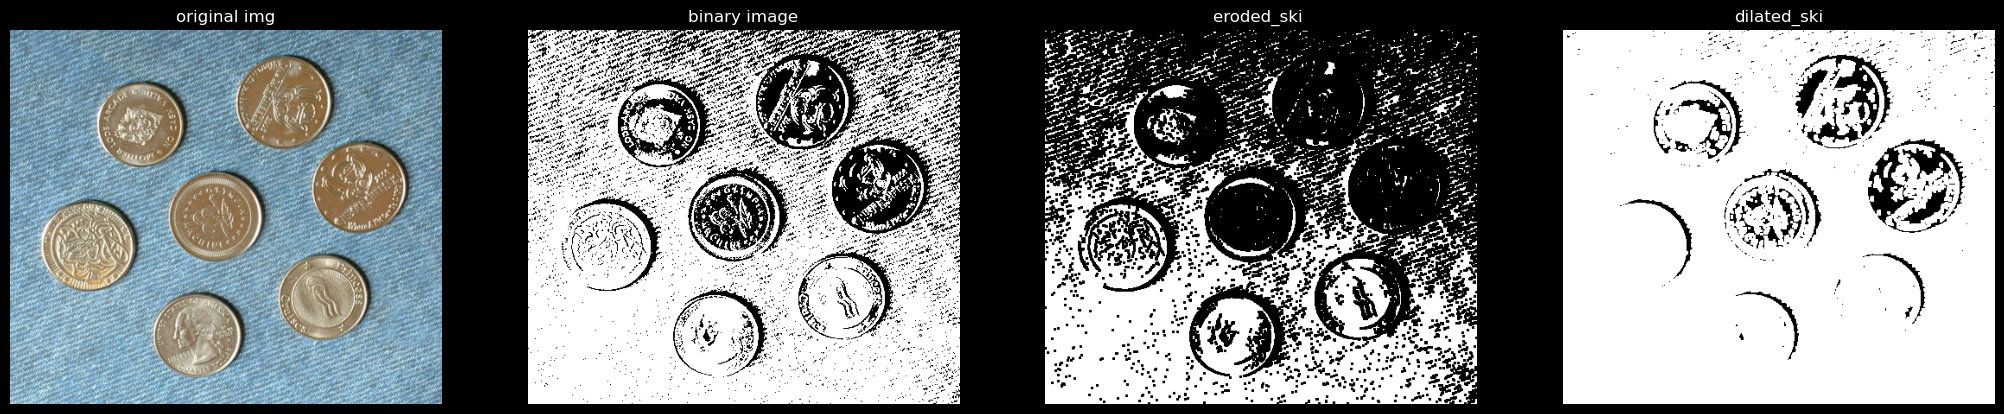

In [14]:
from skimage.morphology import binary_erosion, binary_dilation, square
eroded_ski = binary_erosion(binary_image, square(3))
dilated_ski = binary_dilation(binary_image, square(3))
images=[original_img,binary_image,eroded_ski,dilated_ski]
titles=['original img','binary image','eroded_ski ','dilated_ski']
show_images(images,titles)

1.4455445544554455
4.6
1.7037037037037037
5.666666666666667
0.7777777777777778
2.869565217391304
2.9565217391304346
3.090909090909091
3.090909090909091
1.6666666666666667
1.7777777777777777
1.8888888888888888
2.0
2.888888888888889
4.0
1.0
4.5
0.5
1.3333333333333333
1.0
1.0
6.0
1.0
1.0
1.625
4.333333333333333
2.5
1.0
3.25
6.0
1.0
1.0
0.6666666666666666
1.0
1.0
1.0
1.0
1.0
1.5
2.0
11.0
1.0
1.0


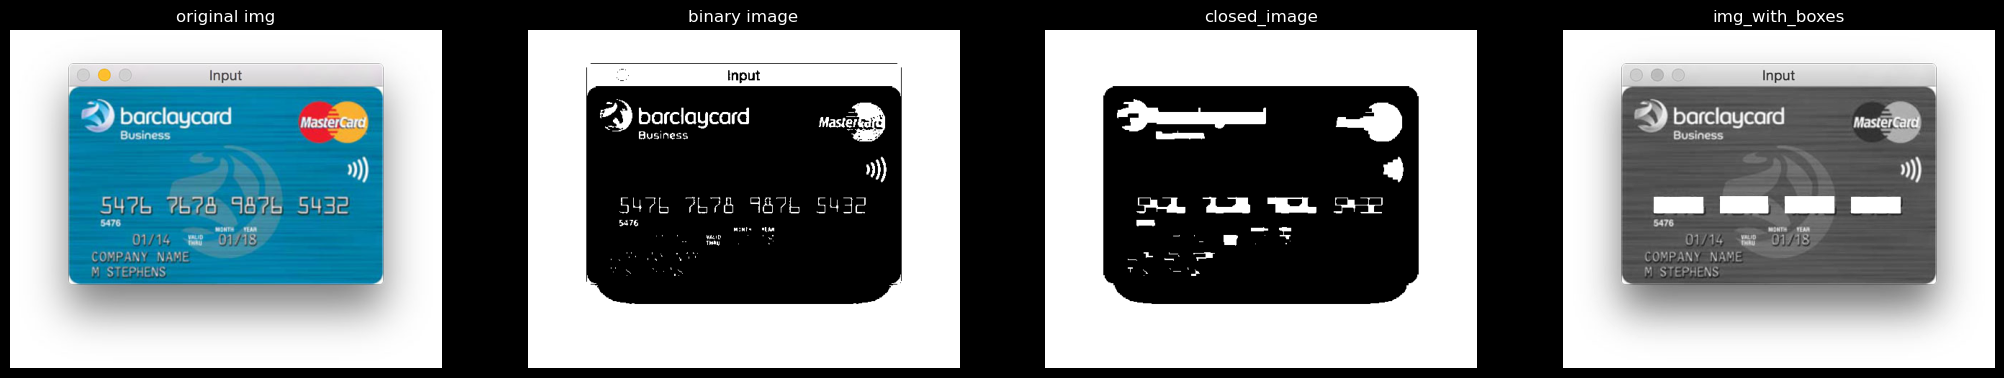

In [68]:
'''
2) Case Study: Credit Card Number Extraction
    - Load "card.jpg" from the img folder
    - Convert the image to binary by brightness thresholding maintaining the card number details for extraction
    - Use your erosion/dilation functions, or Skimage's functions only if you didn't implement them, to apply closing
        Note: The goal of this step is to join the card number into 4 sets of connected pixels
    - Use Skimage's "find_contours" to get the bounding boxes for the credit card's numbers by filtering on aspect ratio (between 2.5 & 3.5)
        Note: When using "find_contours(img, 0.8)" the o/p is a list of contours each having:
                - contour[:,0] being the Y values of the contour perimeter points
                - contour[:,1] being the X values of the contour perimeter points
'''
original_img = io.imread('img/card.jpg')
gray_image = rgb2gray(original_img)

binary_image = ((gray_image >= 0.7)).astype(int) 
mask = np.ones((5, 13))
closed_image = binary_closing(binary_image, mask)
# images=[original_img,binary_image,closed_image]
# titles=['original img','binary image','closed_image']
# show_images(images,titles)

#When provided with the correct format of the list of bounding_boxes, this section will set all pixels inside boxes in img_with_boxes
# for box in bounding_boxes:
#     [Xmin, Xmax, Ymin, Ymax] = box
#     rr, cc = rectangle(start = (Ymin,Xmin), end = (Ymax,Xmax), shape=img_gray.shape)
#     img_with_boxes[rr, cc] = 1 #set color white
contours = find_contours(closed_image, 0.8)

bounding_boxes = []
img_with_boxes=gray_image.copy()

for contour in contours:
    x_min = int(np.min(contour[:, 1]))  # Min X
    x_max = int(np.max(contour[:, 1]))  # Max X
    y_min = int(np.min(contour[:, 0]))  # Min Y
    y_max = int(np.max(contour[:, 0]))  # Max Y
    
    width = x_max - x_min
    height = y_max - y_min
    
    aspect_ratio = width / height if height > 0 else 0  # Avoid division by zero
    
    print(aspect_ratio)
    if 2.5 <= aspect_ratio <= 3.5:

     bounding_boxes.append([x_min, x_max, y_min, y_max])

for box in bounding_boxes:
    [Xmin, Xmax, Ymin, Ymax] = box
    if (Ymax - Ymin) <13:
        continue  # Skip small bounding boxes based on height threshold
    rr, cc = rectangle(start = (Ymin,Xmin), end = (Ymax,Xmax), shape=gray_image.shape)
    img_with_boxes[rr, cc] = 1 #set color white     
images=[original_img,binary_image,closed_image,img_with_boxes]
titles=['original img','binary image','closed_image','img_with_boxes']
show_images(images,titles)



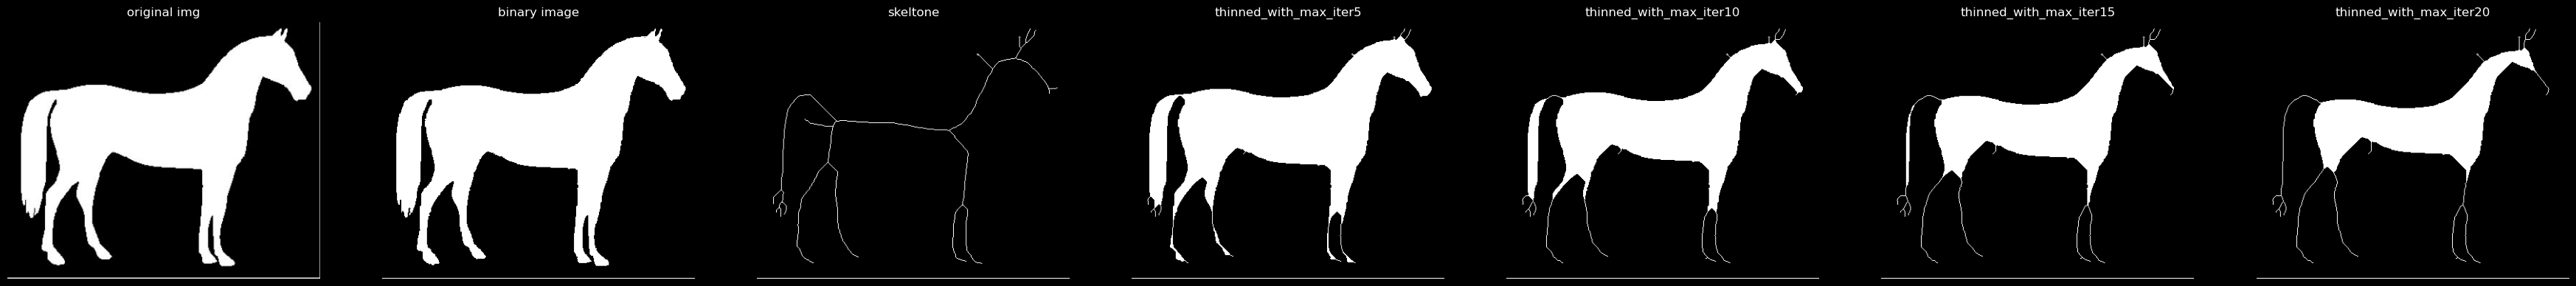

In [67]:
'''
3) Skeletonization:
    - Load "horse.jpg" from the img folder 
    - Use a binary threshold of 0.9 to remove invisible noise in the background
    - Use Skimage's "skeletonize(image)" to acquire the image's skeleton & show it
    - Use Skimage's "thin(image, max_iter)" with values of max_iter 5/10/15/20 & show it
'''
original_img = io.imread('img/horse.jpg')
gray_image = rgb2gray(original_img)

binary_image =  ((gray_image >= 0.9)).astype(int) 
skeleton = skeletonize(binary_image)

thinned = []
thin_t=[]
for i in [5,10,15,20]:
    thinned.append(thin(binary_image, i))
    thin_t.append(f'thinned_with_max_iter{i}')
    

images=[original_img,binary_image ,skeleton]+ thinned
titles=['original img','binary image','skeltone']+thin_t
show_images(images,titles)